In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [3]:
!unzip '/content/gdrive/MyDrive/Plants Project/Plants_Detected_Edge.zip'  

Archive:  /content/gdrive/MyDrive/Plants Project/Plants_Detected_Edge.zip
  inflating: Plants_Detected_Edge/Test/Corn/276__Corn__Gray leaf spot.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/274__Corn__Gray leaf spot.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/381__Corn__Healthy.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/408__Corn__Healthy.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/414__Corn__Healthy.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/138__Corn__Common rust.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/384__Corn__Healthy.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/390__Corn__Healthy.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/129__Corn__Common rust.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/411__Corn__Healthy.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/133__Corn__Common rust.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/131__Corn__Common rust.JPG  
  inflating: Plants_Detected_Edge/Test/Corn/268__Corn__Gray leaf spo

In [4]:
train_dir = '/content/Plants_Detected_Edge/Train/'

In [5]:
width = 10
length = 10

In [6]:
class_names = ['Apple', 'Corn', 'Grapes', 'Tomato']
flat_data_arr = [] #input array
target_arr = [] #output array
#path which contains all the categories of images
for i in class_names:
    print(f'loading... category : {i}')
    path = os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(width,length,1)) # TODO: 1 channel
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(class_names.index(i))
    print(f'loaded category:{i} successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data) #dataframe
df['Target'] = target

loading... category : Apple
loaded category:Apple successfully
loading... category : Corn
loaded category:Corn successfully
loading... category : Grapes
loaded category:Grapes successfully
loading... category : Tomato
loaded category:Tomato successfully


In [7]:

df = df.sample(frac=1)
x = df.iloc[:,:-1] #input data 
y = df.iloc[:,-1] #output data

In [8]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
666,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.037216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.024706,0.105882,0.075686,0.142627,0.147098,0.057647,0.003922,0.000000,0.000000,0.000000
629,0.0,0.012824,0.056078,0.035294,0.089020,0.149020,0.124039,0.096667,0.06549,0.093765,...,0.015686,0.022471,0.030000,0.102078,0.109804,0.045059,0.088627,0.121569,0.062471,0.024706
859,0.0,0.000000,0.000000,0.000000,0.034471,0.138431,0.063255,0.000000,0.00000,0.000000,...,0.000000,0.047843,0.100588,0.057373,0.044314,0.003922,0.020784,0.032549,0.009020,0.000000
1337,0.0,0.000000,0.037255,0.114627,0.021961,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.004314,0.052157,0.018784,0.016863,0.018235,0.019608,0.028627


In [9]:
y.head()

666     1
101     0
629     1
859     2
1337    3
Name: Target, dtype: int64

In [10]:
len(x)

1520

In [17]:
param_grid={'C':[0.0001,1,1000],'gamma':[0.00001,0.01,11],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=35,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)

Splitted Successfully


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.0001, 1, 1000], 'gamma': [1e-05, 0.01, 11],
                         'kernel': ['rbf', 'poly']})

In [13]:
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

The Model is trained well with the given images


In [14]:
len(x_test)

304

In [19]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
accuracy=str(accuracy_score(y_pred,y_test)*100)
print("The model is "+accuracy+"% accurate")

The predicted Data is :
[1 0 0 2 0 3 2 0 3 0 0 1 1 3 3 3 3 1 0 1 1 1 2 2 3 2 2 3 1 3 3 3 2 3 0 2 0
 1 1 2 1 1 2 3 2 0 2 0 2 3 2 0 1 0 2 3 2 0 3 1 1 0 2 0 1 3 3 3 3 0 2 2 0 2
 0 2 3 0 0 2 3 3 0 0 0 1 2 1 0 1 1 3 0 1 2 3 1 0 2 3 2 3 2 2 3 0 2 0 1 2 3
 3 2 2 1 2 3 1 0 1 1 0 0 3 0 1 0 2 2 1 3 3 0 1 0 0 0 2 2 3 3 1 1 2 1 3 2 3
 3 3 2 0 3 3 3 2 2 1 0 3 3 2 2 3 1 0 0 2 3 1 3 1 3 3 2 3 0 0 3 0 1 0 2 1 3
 1 1 1 0 0 1 2 2 3 3 2 1 1 0 1 2 3 1 1 3 3 3 2 1 3 3 3 1 2 2 3 2 2 2 2 2 0
 3 3 1 1 0 3 1 3 0 1 0 1 3 1 0 0 1 3 1 0 3 2 1 2 3 2 0 3 0 3 3 2 3 2 3 2 3
 1 2 1 1 3 1 0 2 3 3 3 0 0 2 3 2 1 0 2 2 1 0 3 3 1 1 3 0 3 0 2 3 0 3 1 0 3
 3 3 1 3 3 1 3 1]
The actual data is:
[1 0 0 2 0 3 2 0 3 0 3 1 1 3 3 0 0 1 0 1 1 1 2 2 2 3 3 0 1 3 3 3 2 3 0 2 0
 1 1 2 1 1 2 3 2 0 2 0 2 3 2 0 0 1 2 3 2 1 2 1 1 0 2 0 1 3 3 3 3 3 2 3 0 2
 0 2 3 0 0 2 1 1 0 0 0 0 2 1 0 1 1 3 0 1 2 3 1 0 2 3 2 3 2 2 3 0 2 0 1 2 2
 3 2 2 0 2 0 1 2 1 1 0 0 2 0 1 0 2 2 1 3 3 0 1 0 2 0 2 2 1 3 1 1 2 1 0 2 3
 3 2 2 3 0 3 1 2 2 1 0 3 3 3 2 0 1 0 3

Enter URL of Image :/content/Plants_Detected_Edge/Test/Apple/140__Apple__Black rot.JPG


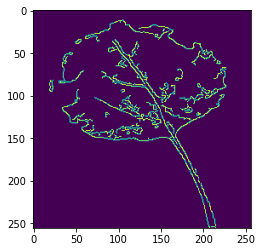

Apple = 96.47368061180372%
Corn = 1.45020177308558%
Grapes = 0.11086321547402683%
Tomato = 1.9652543996366727%
The predicted image is : Apple


In [16]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(width, length,1))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(class_names):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+class_names[model.predict(l)[0]])

In [20]:
with open("/content/gdrive/MyDrive/Plants Project/edge_svm_model_" + str(width) + "x" + str(length) + "_"+ accuracy +"p.pkl", "wb") as file_model:
  pickle.dump(model, file_model )

In [21]:
class_names = ['Apple', 'Corn', 'Grapes', 'Tomato']

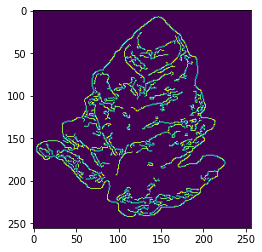

Apple = 1.6821487404327813%
Corn = 0.37718808249091074%
Grapes = 0.3694332316702775%
Tomato = 97.57122994540602%
The predicted image is : Tomato


In [22]:
with open("/content/gdrive/MyDrive/Plants Project/edge_svm_model_" + str(width) + "x" + str(length) + "_"+ accuracy +"p.pkl", "rb") as file:
  l_model = pickle.Unpickler(file)
  l_model = l_model.load()
  # url=input('Enter URL of Image :')
  url = "Plants_Detected_Edge/Test/Tomato/408__Tomato__Septoria leaf spot.JPG"
  img=imread(url)
  plt.imshow(img)
  plt.show()
  img_resize=resize(img,(width, length,1))
  l=[img_resize.flatten()]
  probability=l_model.predict_proba(l)
  for ind,val in enumerate(class_names):
      print(f'{val} = {probability[0][ind]*100}%')
  print("The predicted image is : "+class_names[l_model.predict(l)[0]])

In [23]:
l_model = None
with open("/content/gdrive/MyDrive/Plants Project/edge_svm_model_" + str(width) + "x" + str(length) + "_"+ accuracy +"p.pkl", "rb") as file:
    l_model = pickle.Unpickler(file)
    l_model = l_model.load()
def classifyImage(url):
    img=imread(url)
    plt.imshow(img)
    plt.show()
    img_resize=resize(img,(width, length,1))
    l=[img_resize.flatten()]
    probability=l_model.predict_proba(l)
    for ind,val in enumerate(class_names):
        print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+class_names[l_model.predict(l)[0]])

Plants_Detected_Edge/Test/Apple/256__Apple__Apple scab.JPG Apple


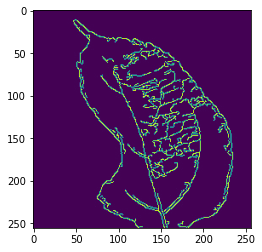

Apple = 73.01874448993637%
Corn = 2.498682032457631%
Grapes = 3.572616005700259%
Tomato = 20.909957471905777%
The predicted image is : Apple
--------------------------------------------
Plants_Detected_Edge/Test/Apple/272__Apple__Apple scab.JPG Apple


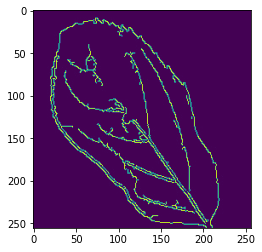

Apple = 98.11842289460421%
Corn = 0.9252540440230247%
Grapes = 0.1418841808572075%
Tomato = 0.8144388805155542%
The predicted image is : Apple
--------------------------------------------
Plants_Detected_Edge/Test/Apple/266__Apple__Apple scab.JPG Apple


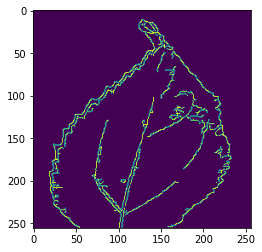

Apple = 97.08319853363626%
Corn = 0.6274369515032638%
Grapes = 0.5533832225997202%
Tomato = 1.7359812922607873%
The predicted image is : Apple
--------------------------------------------
Plants_Detected_Edge/Test/Apple/387__Apple__Healthy.JPG Apple


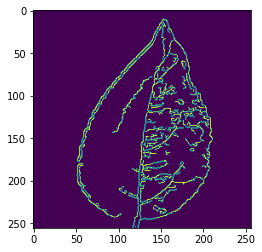

Apple = 96.87837604789462%
Corn = 0.44842989420256973%
Grapes = 0.23232967145631686%
Tomato = 2.440864386446481%
The predicted image is : Apple
--------------------------------------------
Plants_Detected_Edge/Test/Apple/411__Apple__Healthy.JPG Apple


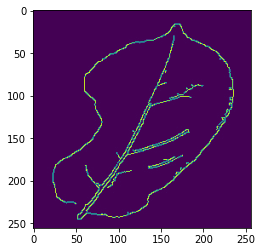

Apple = 99.81924868097693%
Corn = 0.06050384744676215%
Grapes = 0.04559633019263879%
Tomato = 0.07465114138368466%
The predicted image is : Apple
--------------------------------------------
Plants_Detected_Edge/Test/Tomato/97__Tomato__Early blight.JPG Tomato


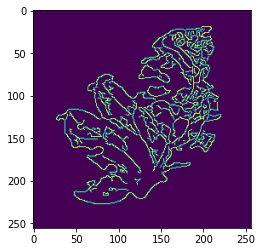

Apple = 1.7488464780581323%
Corn = 0.6285271656263491%
Grapes = 0.38099761189855963%
Tomato = 97.24162874441696%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Tomato/420__Tomato__Septoria leaf spot.JPG Tomato


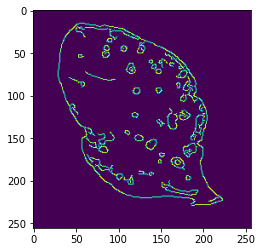

Apple = 2.8962182325783723%
Corn = 0.13396568856767446%
Grapes = 0.0440438168126742%
Tomato = 96.9257722620413%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Tomato/306__Tomato__Leaf mold.JPG Tomato


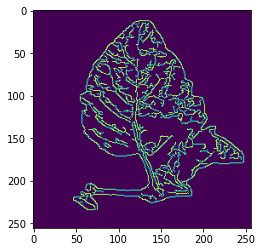

Apple = 2.637295460875161%
Corn = 1.5155672550440324%
Grapes = 14.34577737671493%
Tomato = 81.50135990736588%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Tomato/392__Tomato__Septoria leaf spot.JPG Tomato


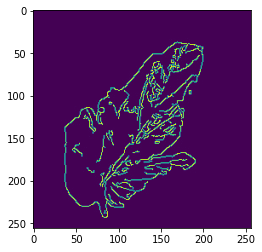

Apple = 2.8984945624845095%
Corn = 0.19880243826819788%
Grapes = 0.0418697668139201%
Tomato = 96.86083323243336%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Tomato/196__Tomato__Healthy.JPG Tomato


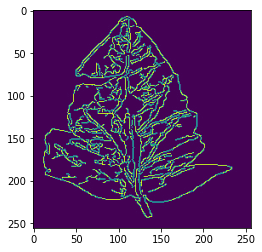

Apple = 1.3982442390523435%
Corn = 0.4083490599961605%
Grapes = 0.3077204757162362%
Tomato = 97.88568622523528%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Corn/264__Corn__Gray leaf spot.JPG Corn


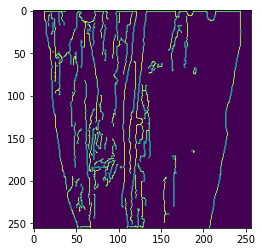

Apple = 0.6474605165454588%
Corn = 98.98551552534303%
Grapes = 0.11229452881835944%
Tomato = 0.25472942929315956%
The predicted image is : Corn
--------------------------------------------
Plants_Detected_Edge/Test/Corn/399__Corn__Healthy.JPG Corn


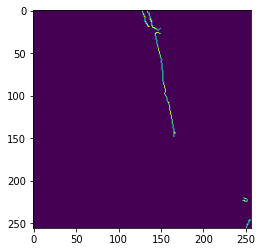

Apple = 4.251468132213705e-06%
Corn = 99.98380782252387%
Grapes = 6.443155417344304e-05%
Tomato = 0.016123494453820112%
The predicted image is : Corn
--------------------------------------------
Plants_Detected_Edge/Test/Corn/268__Corn__Gray leaf spot.JPG Corn


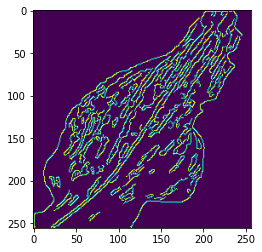

Apple = 5.288914069279357%
Corn = 14.739154020244927%
Grapes = 7.0795524585216%
Tomato = 72.89237945195411%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Corn/258__Corn__Gray leaf spot.JPG Corn


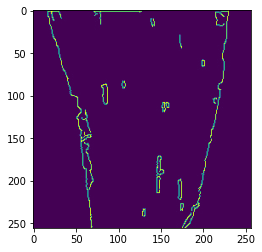

Apple = 0.9350414048732356%
Corn = 98.92207418767892%
Grapes = 0.0024275158930154896%
Tomato = 0.14045689155483718%
The predicted image is : Corn
--------------------------------------------
Plants_Detected_Edge/Test/Corn/137__Corn__Common rust.JPG Corn


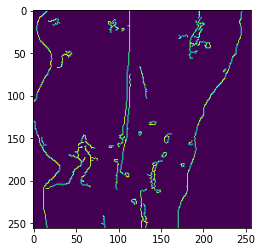

Apple = 0.9262325529194706%
Corn = 99.02508559145082%
Grapes = 0.000618448423396945%
Tomato = 0.048063407206335826%
The predicted image is : Corn
--------------------------------------------
Plants_Detected_Edge/Test/Grapes/260__Grapes__Isariopsis__High.JPG Grapes


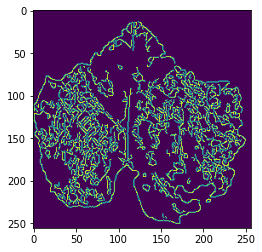

Apple = 3.6450674104404763%
Corn = 7.991291632621674%
Grapes = 78.55842314429484%
Tomato = 9.805217812643049%
The predicted image is : Grapes
--------------------------------------------
Plants_Detected_Edge/Test/Grapes/679__Grapes__Healthy__No label.JPG Grapes


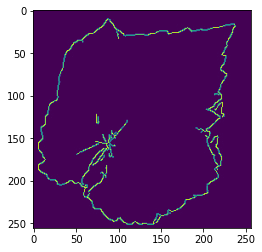

Apple = 46.82412902740712%
Corn = 38.39015181156667%
Grapes = 13.099546631731181%
Tomato = 1.6861725292950256%
The predicted image is : Apple
--------------------------------------------
Plants_Detected_Edge/Test/Grapes/52__Grapes__Black rot__High.JPG Grapes


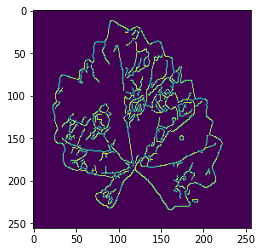

Apple = 11.744405041429273%
Corn = 0.4779062232590807%
Grapes = 11.771202395098488%
Tomato = 76.00648634021314%
The predicted image is : Tomato
--------------------------------------------
Plants_Detected_Edge/Test/Grapes/150__Grapes__Esca__High.JPG Grapes


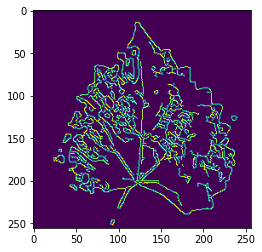

Apple = 0.5623418688477839%
Corn = 0.11430437214365495%
Grapes = 95.98014600624569%
Tomato = 3.3432077527628694%
The predicted image is : Grapes
--------------------------------------------
Plants_Detected_Edge/Test/Grapes/300__Grapes__Isariopsis__Low.JPG Grapes


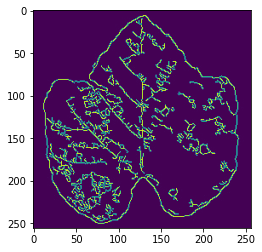

Apple = 0.8340165702447352%
Corn = 0.21663949207382918%
Grapes = 98.75127981625428%
Tomato = 0.19806412142715202%
The predicted image is : Grapes
--------------------------------------------


In [24]:
xpath = 'Plants_Detected_Edge/Test'

# plant = ['Apple', 'Corn', 'Tomato', 'Grapes']
for folder, subfolders, filenames in os.walk(xpath):
  i = 0
  for f in filenames:
      f1 =  folder + "/" +os.path.relpath(f)
      if i<5:
        className = f1.split("/")[2]
        print(f1, className)
        classifyImage(f1)
        print("--------------------------------------------")
        i+=1
        # img = cv2.imread(f1)

In [25]:
l_model = None

with open("/content/gdrive/MyDrive/Plants Project/edge_svm_model_" + str(width) + "x" + str(length) + "_"+ accuracy +"p.pkl", "rb") as file:
    l_model = pickle.Unpickler(file)
    l_model = l_model.load()

def classifyImage(url):
    img=imread(url)
    # plt.imshow(img)
    # plt.show()
    img_resize=resize(img,(width, length,1))
    l=[img_resize.flatten()]
    return class_names[l_model.predict(l)[0]]

def accuracyOfSVM(xpath):
  count = {}
  for folder, subfolders, filenames in os.walk(xpath):
    for f in filenames:
        f1 =  folder + "/" +os.path.relpath(f)
        className = f1.split("/")[2]
        # print(f1, className)
        pred = classifyImage(f1)
        # print("predicted:", pred, "; class:", className)
        if(pred == className):
          count[className] = count.get(className, 0) + 1
  
  print(count)

In [26]:
xpath = 'Plants_Detected_Edge/Test'
accuracyOfSVM(xpath)

{'Apple': 35, 'Tomato': 40, 'Corn': 39, 'Grapes': 32}


In [27]:
xpath = 'Plants_Detected_Edge/Train'
accuracyOfSVM(xpath)

{'Apple': 357, 'Tomato': 369, 'Corn': 367, 'Grapes': 369}


In [ ]:
1065/1100

0.9681818181818181

In [ ]:
(1065+1085+1075+1070) / 4400

0.9761363636363637

In [ ]:
(107+106+109+108) / 440

0.9772727272727273